[10, 12, 5, 10, 9, 13, 18, 6, 0, 14, 15, 7, 15, 10, 14, 8, 8, 11, 15, 0, 14, 16, 16, 6, 0, 19, 11, 12, 17, 10, 8, 10, 15, 13, 8, 5, 0, 15, 14, 8, 5, 11, 14, 9, 15, 10, 11, 13, 13, 16, 13, 15, 12, 10, 6, 12, 11, 0, 16, 17, 14, 10, 10, 6, 9, 17, 8, 10, 9, 15, 6, 10, 15, 19, 12, 6, 9, 15, 5]
[ 7.9297126  12.75881039  2.69818999  8.33213741  8.33213741 12.75881039
 19.60003225  6.32001334  3.90546444 12.75881039 15.17335928  5.91758852
 14.05308901 10.83369048 14.77093447  8.33213741  6.72243815 10.83369048
 15.97820891  5.11273889 14.36850965 16.06521309 15.5757841   4.30788926
  3.90546444 20.00245707 10.74668631  9.62641604 17.58790818 10.34426149
  7.52728778  7.9297126  15.5757841  12.75881039  6.32001334  3.90546444
 -0.83662917 15.17335928 12.75881039  6.80944233  5.19974306  9.53941186
 14.45551383  8.33213741 16.4676379   9.94183668 11.14911112 14.36850965
 11.95396076 16.78305854 13.56366002 15.17335928 10.43126567  8.33213741
  4.30788926 11.55153594 10.83369048  2.78519417 15.9

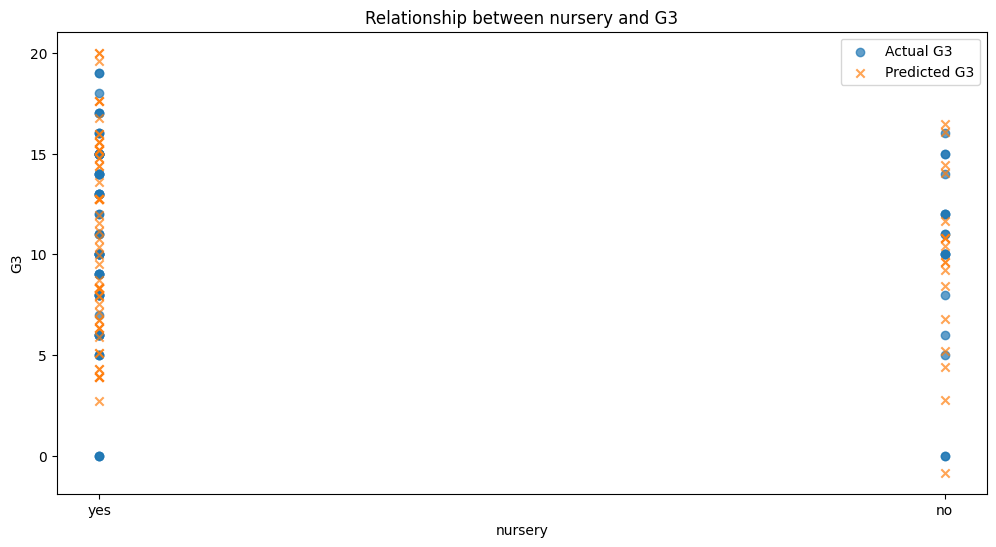

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')  # Replace 'your_dataset.csv' with the actual file path

# Select relevant columns for analysis
data = df[['nursery', 'G1', 'G2', 'G3']]

# Calculate the mean of G1, G2, and G3 for each row using .loc
data = data.assign(mean_G=data[['G1', 'G2', 'G3']].mean(axis=1))

# One-hot encode 'nursery'
data = pd.get_dummies(data, columns=['nursery'], drop_first=True)

# Split the data into features (X) and target variable (y)
X = data[['mean_G', 'nursery_yes']]
y = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print(y_test.values.tolist())
print(y_pred)

# Create a DataFrame with the original 'nursery' and mean_G columns and predicted/actual G3 values
plot_data = pd.DataFrame({'nursery': df.loc[X_test.index, 'nursery'], 'Mean G': X_test['mean_G'], 'Actual G3': y_test.values, 'Predicted G3': y_pred})

# Plot the relationship between 'nursery' and G3
plt.figure(figsize=(12, 6))
plt.scatter(plot_data['nursery'], plot_data['Actual G3'], label='Actual G3', alpha=0.7)
plt.scatter(plot_data['nursery'], plot_data['Predicted G3'], label='Predicted G3', marker='x', alpha=0.7)
plt.xlabel('nursery')
plt.ylabel('G3')
plt.title('Relationship between nursery and G3')
plt.legend()
plt.show()
